The fastest option for saving FLIR images is in Mono-8bit raw. This code demonstrates how to open a .raw file and save it to a tradiational image format. 

Time:  0.021603822708129883 seconds 


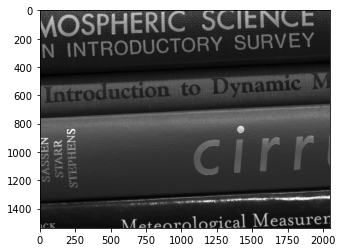

In [69]:
from matplotlib import pyplot as plt
import matplotlib
import cv2
from PIL import Image
import numpy as np
import time

#Define size of image. 2048x1536 is a full frame of the FLIR BFS-U3-32S4
cols = 2048
rows = 1536

#Sample file
file = 'FLIR_example_8bitMONO.raw'

# Define start time for benchmarking
start_time = time.time()
#open file and read into 1-D array
raw_file = open(file)
img = np.fromfile(raw_file, dtype = np.uint8, count = rows * cols) #np.uint8 for 8-bit MONO raw. 

#close file
raw_file.close()

#convert linear array to 2D image
img.shape = (img.size // cols, cols)

# USE openCV and a Canny edge detector to check for in-focus objects
can_img = cv2.Canny(img,50,150)

if np.max(can_img) > 0:  #If ojects exist (edges found), save image 
    final_img.save("test_nocompress.tiff") #Fastest option for high frame rates
    #final_img.save("test.jpg",quality=70) #Matches speed for tiff lzw, reasonable balance 
    #final_img.save("test.tiff",compression="tiff_lzw") #Use Tiff LZW for lossless
print("Time:  %s seconds " % (time.time() - start_time))

plt.imshow(img,cmap="Greys_r")
plt.show()